This notebook contains code to generate all figures for the paper.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from compare_wandb import load_full_df, multimsa_pair_plot

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 8,
})

# Figure 2

In [77]:
RUNS = {
    "fatt": "xuofwjtc",
    "gremlin": "dbuvl02g",
}

fig3_df = load_full_df(RUNS, ["protbert_bfd", "transformer"])

100%|██████████| 748/748 [00:00<00:00, 82836.23it/s]

xuofwjtc has 748 runs
dbuvl02g has 748 runs
unfinished included boi
l37wrnsa has 748 runs
zd8rc6j7 has 748 runs
Shape pre dropping NaNs (2857, 15)
Shape post dropping NaNs (2857, 15)



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

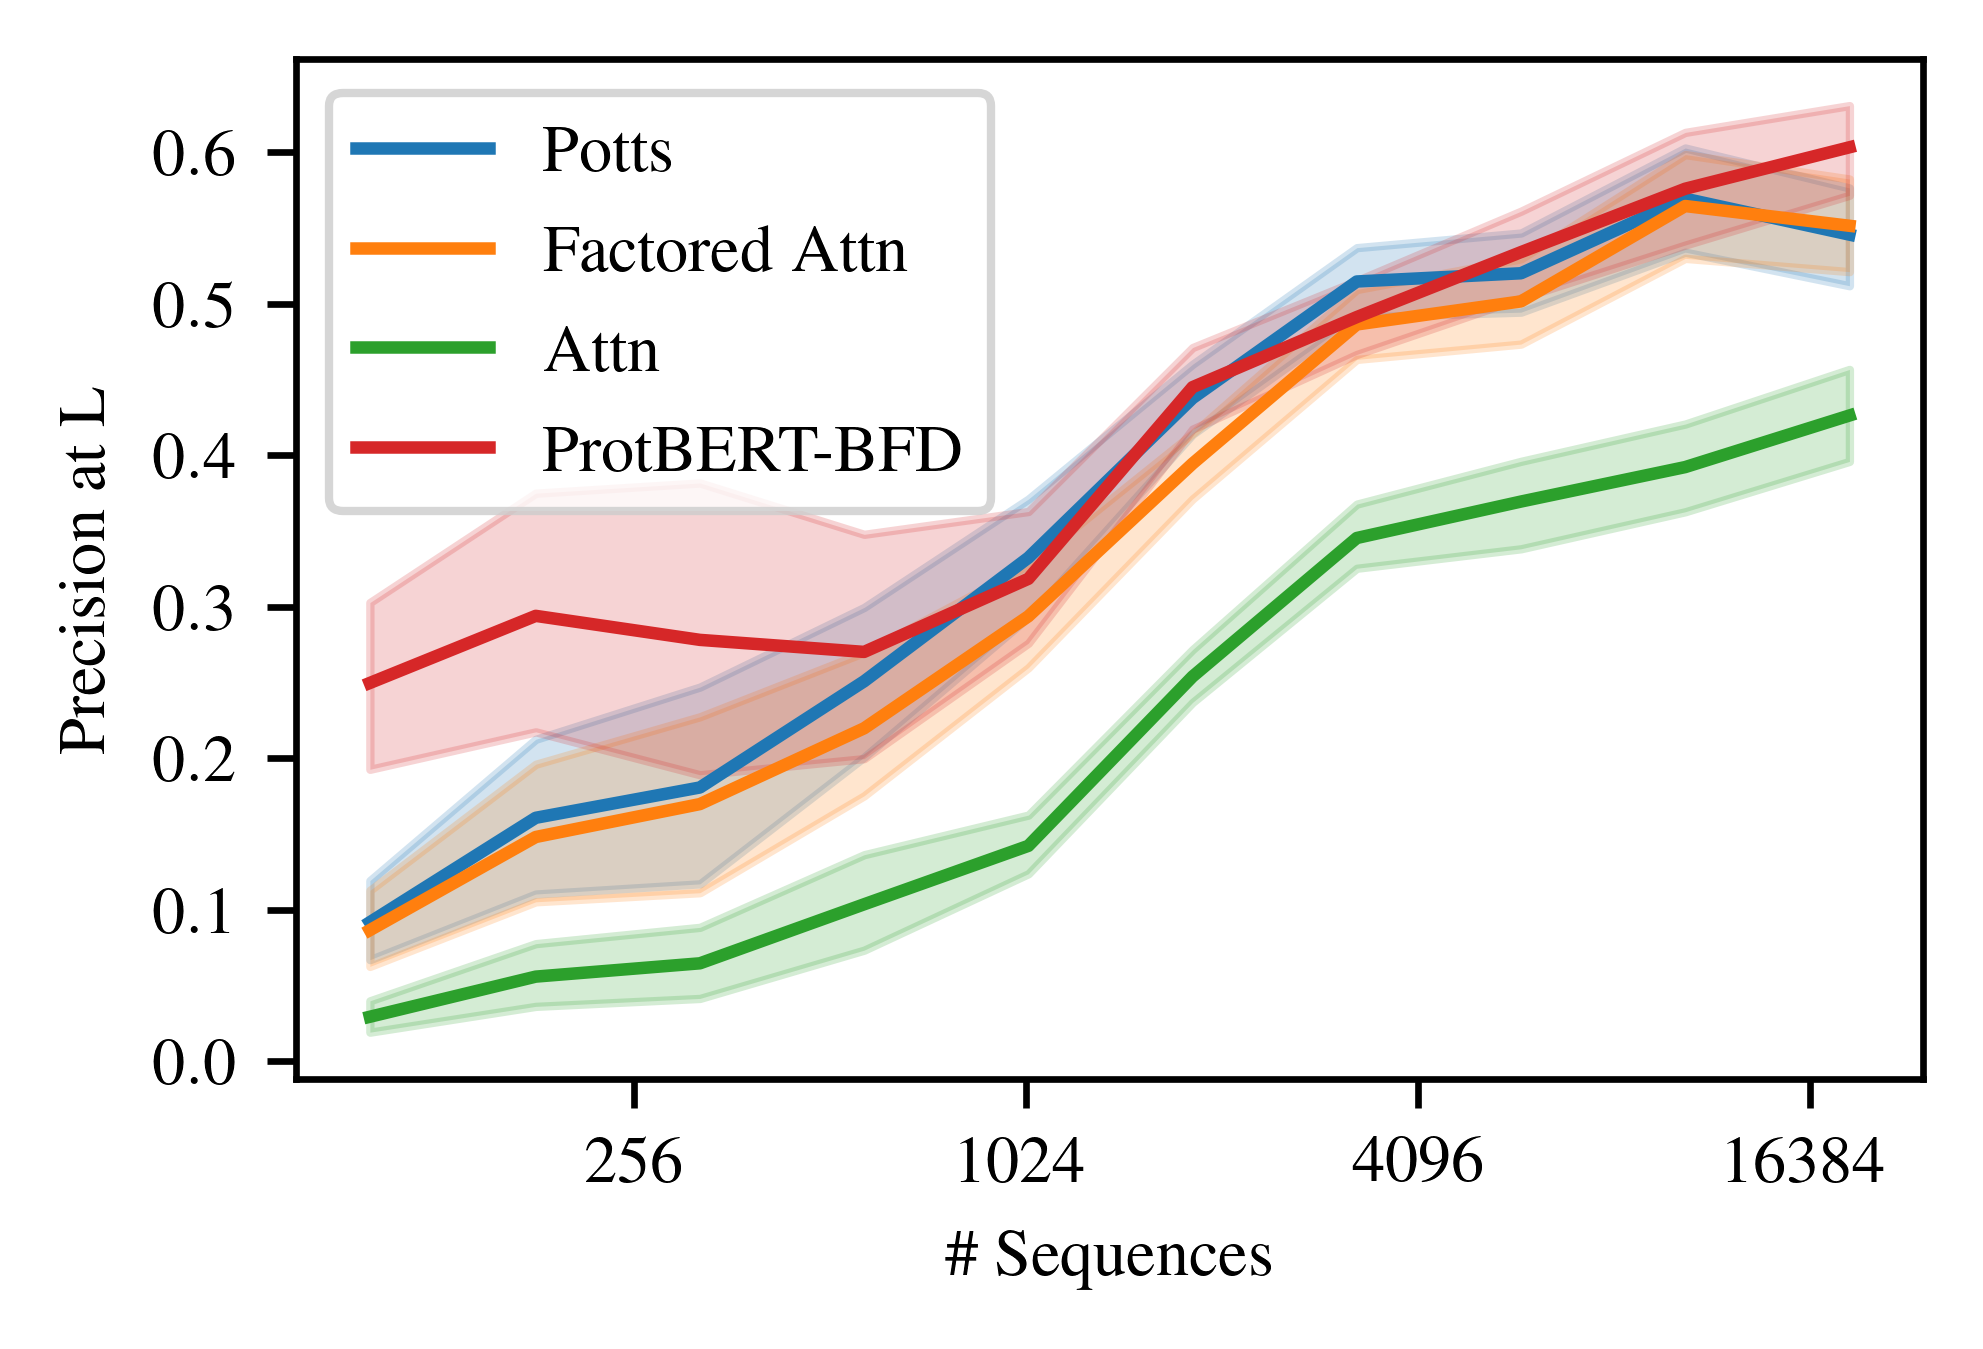

Checking some medians

In [75]:
print(fig3_df[fig3_df.sweep_name == "gremlin"].pr_at_L_apc.median())
print(fig3_df[fig3_df.sweep_name == "fatt"].pr_at_L_apc.median())
print(fig3_df[fig3_df.sweep_name == "protbert_bfd"].pr_at_L_apc.median())

0.47559523582458496
0.441808357834816
0.4848484992980957


In [76]:
idx = fig3_df["msa_length"] <= 256

_d = fig3_df[idx]
print(_d[_d.sweep_name == "gremlin"].pr_at_L_apc.mean())
print(_d[_d.sweep_name == "fatt"].pr_at_L_apc.mean())
print(_d[_d.sweep_name == "protbert_bfd"].pr_at_L_apc.mean())

0.4278597064740542
0.4091985261812806
0.4474720601813561


# Figure 3

In [235]:
RUNS = {
    "fatt": "xuofwjtc",
    "gremlin": "dbuvl02g",
}

fig3_df = load_full_df(RUNS, ["protbert_bfd", "transformer"])

many_fams_df = fig3_df[fig3_df.num_seqs >= 256]

100%|██████████| 748/748 [00:00<00:00, 88949.54it/s]

xuofwjtc has 748 runs
dbuvl02g has 748 runs
unfinished included boi
l37wrnsa has 748 runs
zd8rc6j7 has 748 runs
Shape pre dropping NaNs (2857, 15)
Shape post dropping NaNs (2857, 15)



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

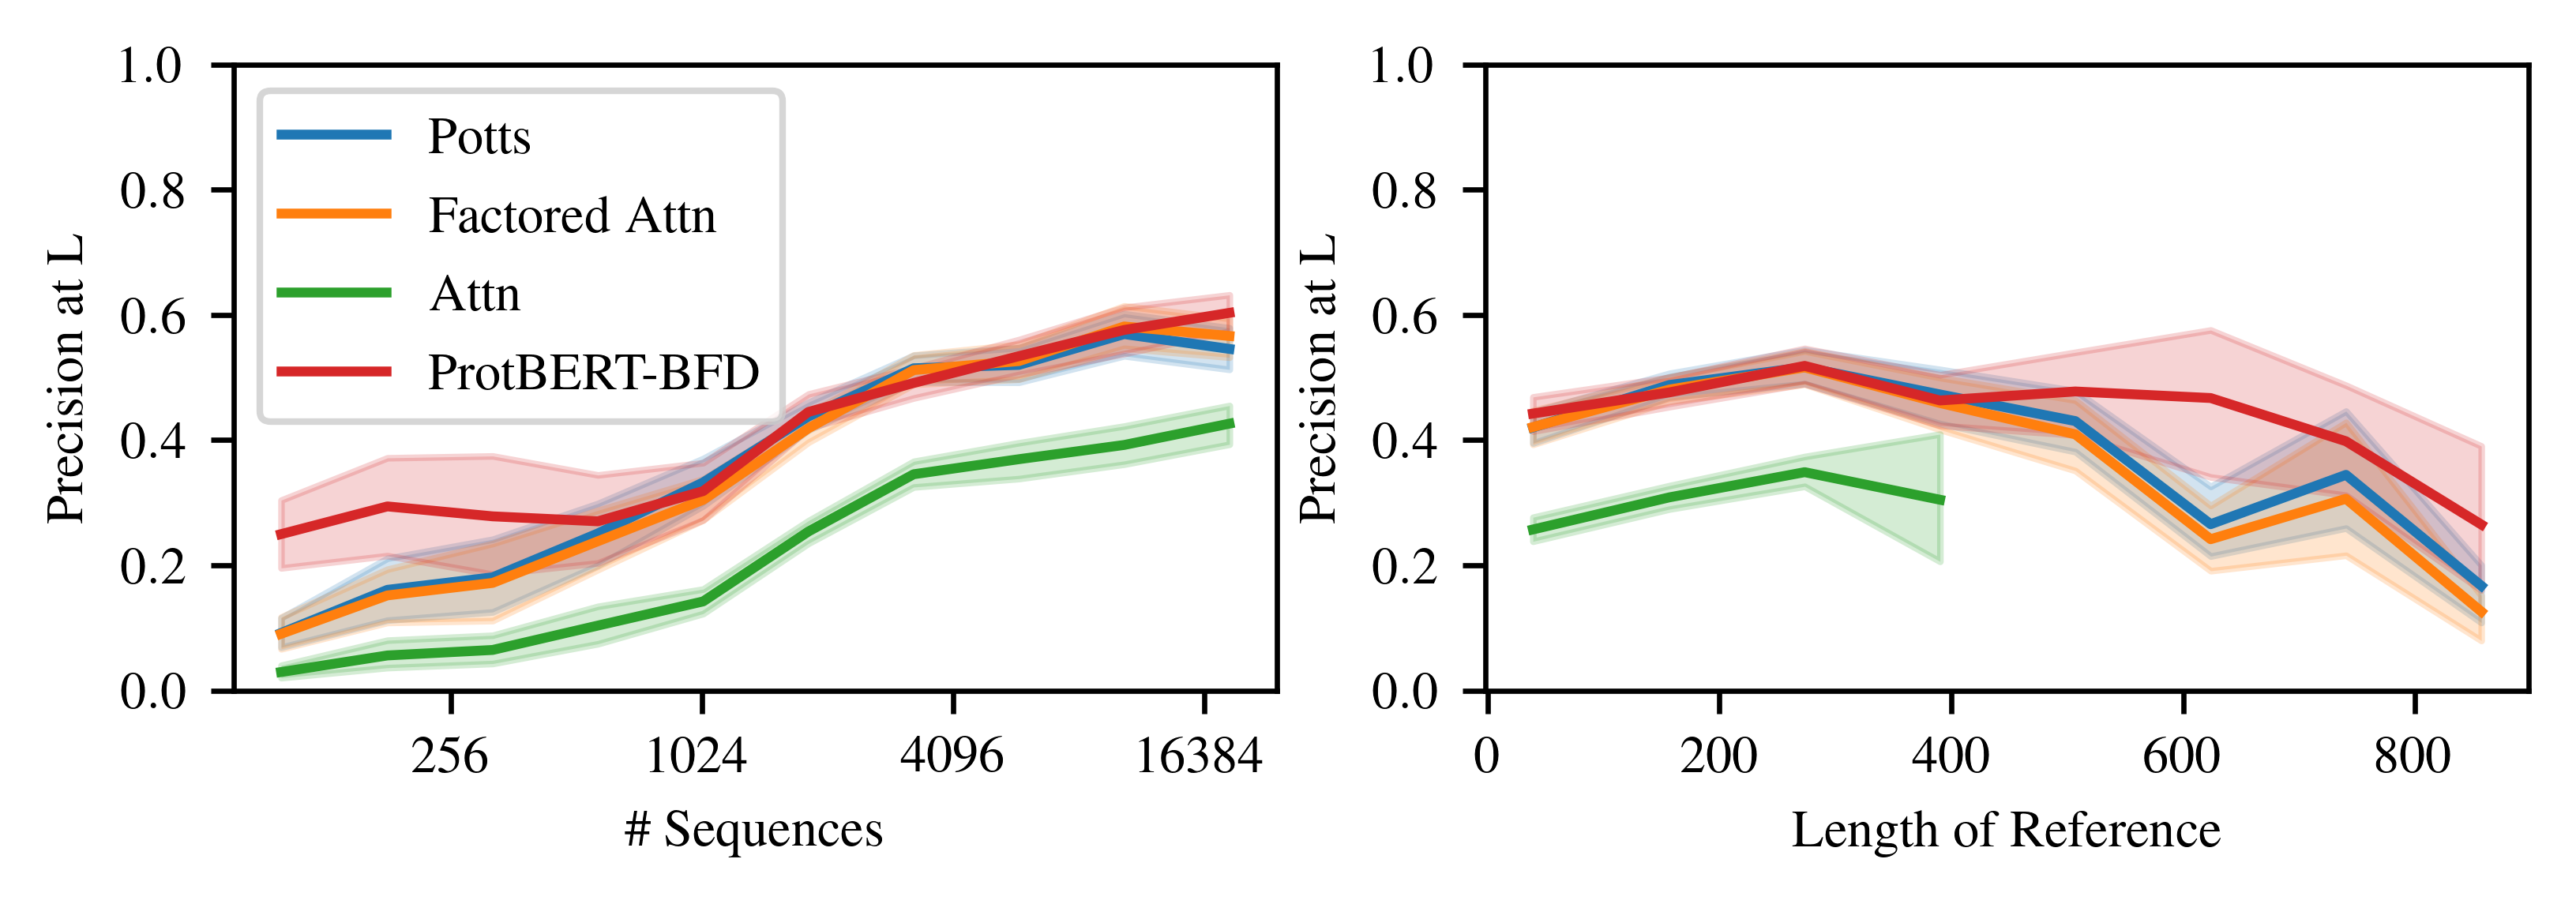

In [250]:
fig, ax = plt.subplots(figsize=(6.25, 1.75), ncols=2, dpi=600) #figsize=(2.5, 4.5), dpi=600)

out, bins = pd.cut(fig3_df["log_num_seqs"], bins=10, retbins=True, include_lowest=True, labels=False)
sns.lineplot(
    x=bins[np.array(out, dtype=np.int32)], 
    y="pr_at_L", 
    hue="sweep_name", 
    hue_order=["gremlin-apc", "fatt-apc", "transformer-apc", "protbert_bfd-apc"], 
    data=fig3_df, 
    ax=ax[0]
)
ax[0].legend(["Potts", "Factored Attn", "Attn", "ProtBERT-BFD"])
ax[0].set_xlabel("\# Sequences")
ax[0].set_xticks([8, 10, 12, 14])
ax[0].set_xticklabels(2 ** np.array([8, 10, 12, 14]))
ax[0].set_ylabel("Precision at L")
ax[0].set_ylim(0, 1.0)
#ax[1].set_xticklabels([256, 1024, 4096, 16384])

out, bins = pd.cut(many_fams_df["msa_length"], bins=8, retbins=True, include_lowest=True, labels=False)
sns.lineplot(
    x=bins[np.array(out, dtype=np.int32)], 
    y="pr_at_L_apc", 
    hue="sweep_name", 
    hue_order=["gremlin-apc", "fatt-apc", "transformer-apc", "protbert_bfd-apc"], 
    data=many_fams_df, 
    ax=ax[1]
)
ax[1].set_xlabel("Length of Reference")
ax[1].set_ylabel("Precision at L")
ax[1].set_ylim(0, 1.0)
ax[1].get_legend().remove()
plt.savefig("figs/final/trends.pdf", bbox_inches="tight")
plt.show()


Count some total params

In [145]:
msa_lens = fig4_df[fig4_df.sweep_name == "gremlin"].msa_length.astype(np.int32)

total_gremlin = msa_lens.map(gremlin)
total_fatt = msa_lens.map(lambda x: fatt(x, 128, 32))

print(f"Gremlin: {total_gremlin.sum():2e}, Fat: {total_fatt.sum():.2e}, factor: {total_gremlin.sum() / total_fatt.sum()}")

Gremlin: 1.265179e+10, Fat: 1.55e+09, factor: 8.139002350164555


In [142]:
long_idx = msa_lens >= 440

msa_lens = fig4_df[fig4_df.sweep_name == "gremlin"].msa_length.astype(np.int32)

longs = msa_lens[long_idx]
long_gremlin = longs.map(gremlin)
long_fatt = longs.map(lambda x: fatt(x, 256, 32))

print(f"Gremlin: {total_gremlin.sum():2e}, Fat: {total_fatt.sum():.2e}, factor: {total_gremlin.sum() / total_fatt.sum()}")

Gremlin: 1.265179e+10, Fat: 3.11e+09, factor: 4.069501175082277


In [143]:
(long_gremlin.sum() - long_fatt.sum()) / (total_gremlin.sum() - total_fatt.sum())

0.4994934056929355

# Figure 4

In [19]:
HEAD_RUNS = {
    "fatt-8-32": "8yi6a4w5",
    "fatt-64": "kqe7or39",
    "fatt-128": "32emd6ri",
    "fatt-256": "xuofwjtc",
    "fatt-512": "bxnkt0uq",
}

heads_df = load_full_df(HEAD_RUNS, [], include_num_heads=True)
#gremlin_df = heads_df[heads_df.sweep_name == "gremlin"]


100%|██████████| 748/748 [00:00<00:00, 50408.74it/s]

8yi6a4w5 has 2233 runs
kqe7or39 has 748 runs
32emd6ri has 748 runs



100%|██████████| 748/748 [00:00<00:00, 50415.22it/s]
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a c

xuofwjtc has 748 runs
bxnkt0uq has 748 runs
unfinished included boi
Shape pre dropping NaNs (5198, 16)
Shape post dropping NaNs (5198, 16)


In [21]:
GREMLIN = {
    "gremlin": "dbuvl02g",
}

gremlin_df = load_full_df(GREMLIN, [])

100%|██████████| 748/748 [00:00<00:00, 32454.45it/s]

dbuvl02g has 748 runs
unfinished included boi
Shape pre dropping NaNs (748, 15)
Shape post dropping NaNs (748, 15)


In [22]:
# Helps set even scaling for trend plots
head_num_to_idx = {
    8: 0,
    16: 1,
    32: 2,
    64: 3,
    128: 4,
    256: 5,
    512: 6,
}

heads_df["heads_idx"] = heads_df.num_attention_heads.map(lambda x : head_num_to_idx[x])
gremlin_df["heads_idx"] = 7
fig5_df = pd.concat([heads_df, gremlin_df])

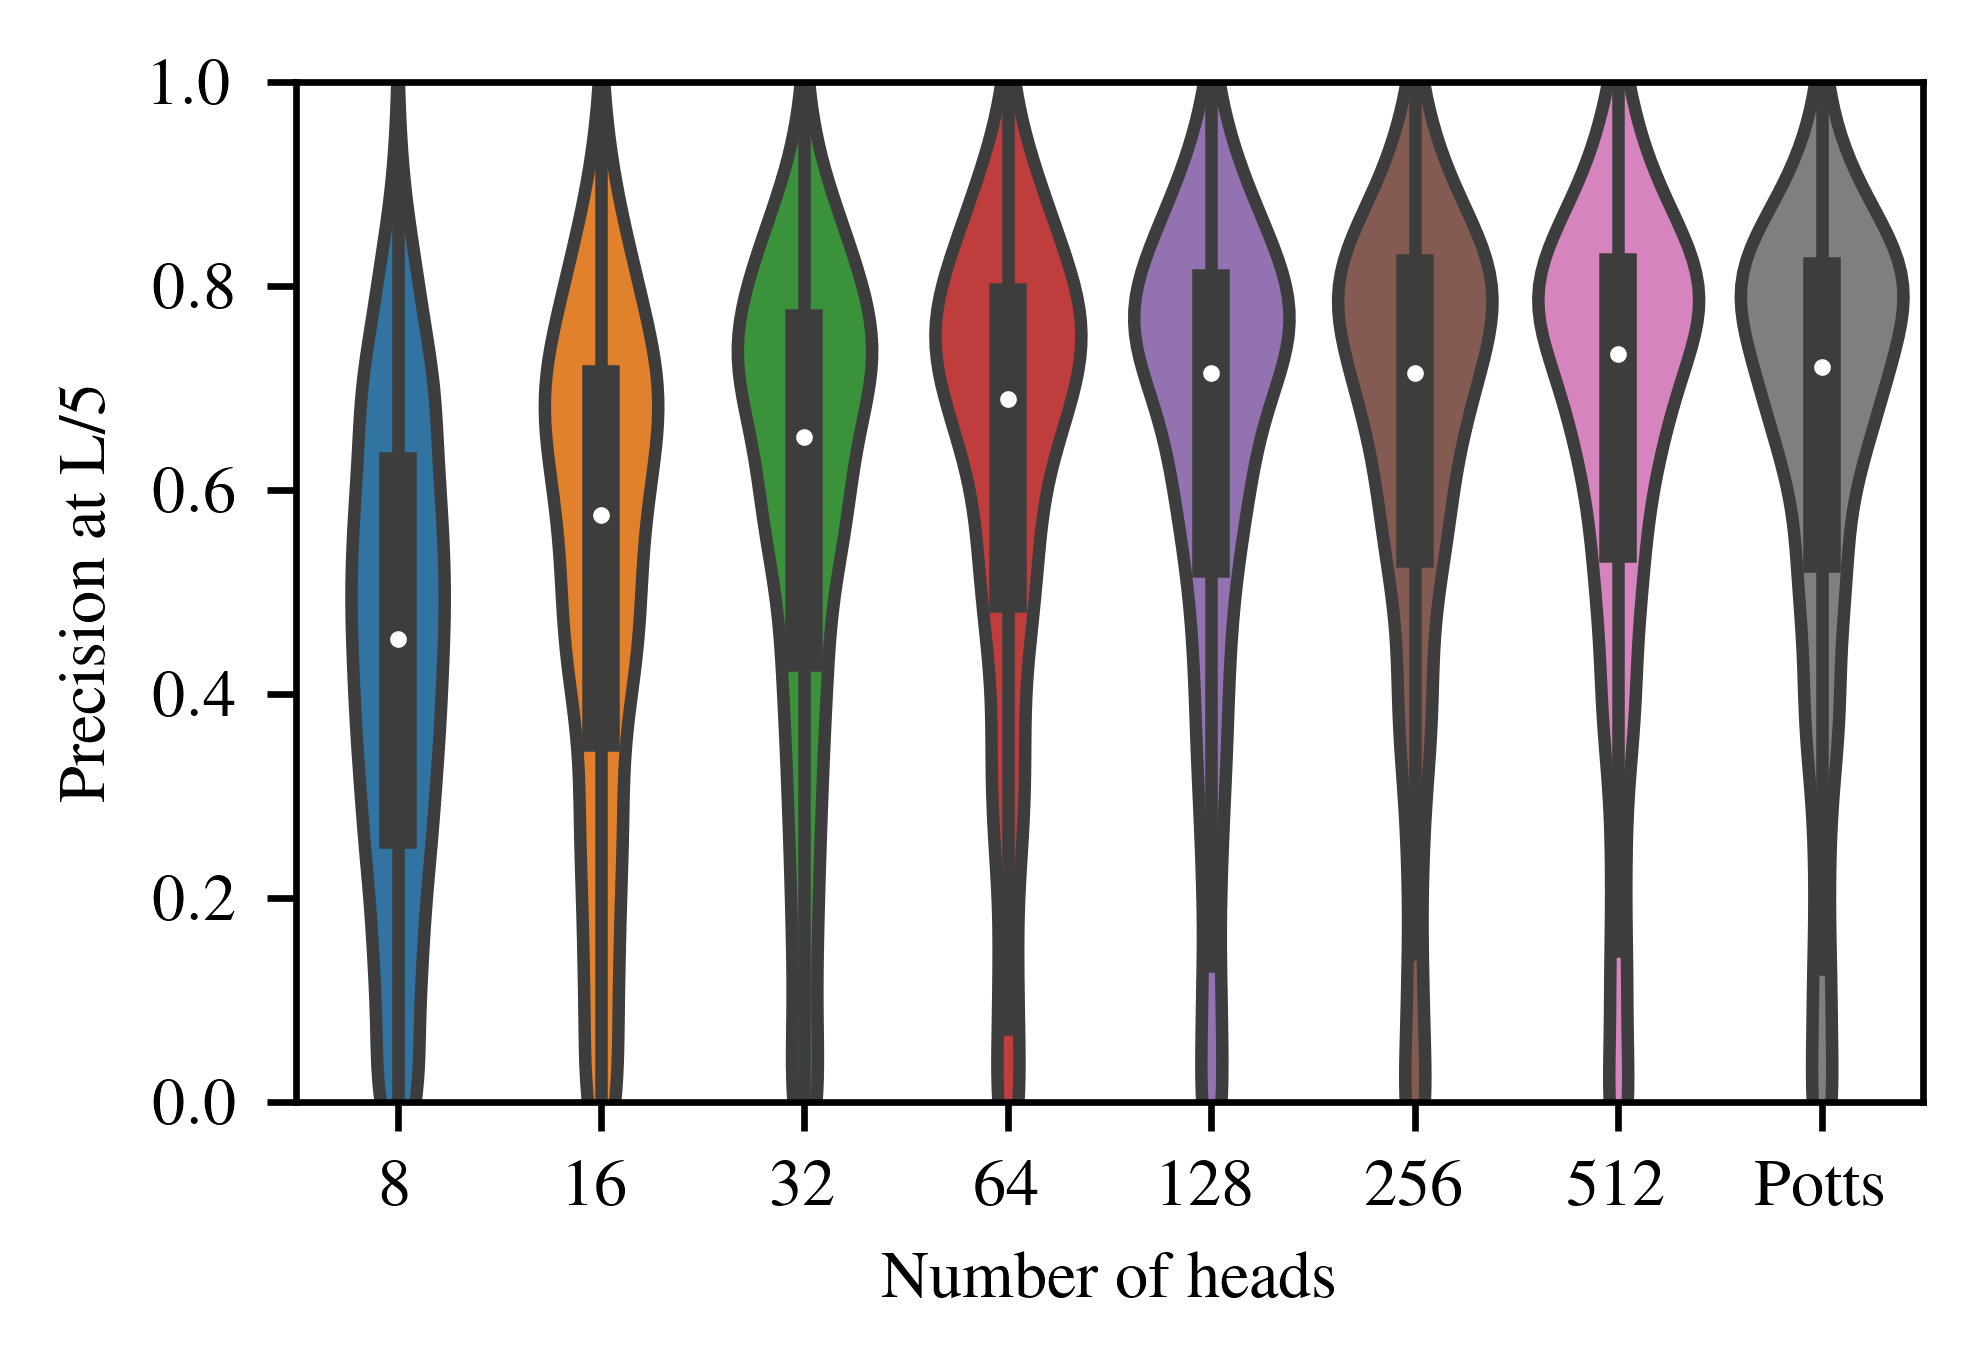

In [153]:
fig, ax = plt.subplots(figsize=(3.5, 2.25), dpi=600) 

#sns.violinplot(x="heads_idx", y="pr_at_L_apc", data=fig5_df, ax=ax[0])
sns.violinplot(x="heads_idx", y="pr_at_L_5_apc", data=fig5_df, ax=ax)
ax.set_ylabel("Precision at L/5")
ax.set_ylim(0, 1.0)
ax.set_xlabel("Number of heads")
ax.set_xticklabels([8, 16, 32, 64, 128, 256, 512, "Potts"])
#ax[1].set_xlabel("Number of heads")
#ax[1].set_ylabel("")
#ax[1].set_xticklabels([8, 16, 32, 64, 128, 256, 512, "Potts"])
plt.savefig("figs/final/head_size_trends.pdf", bbox_inches="tight")
plt.show()

comparison families:  728
spoagef


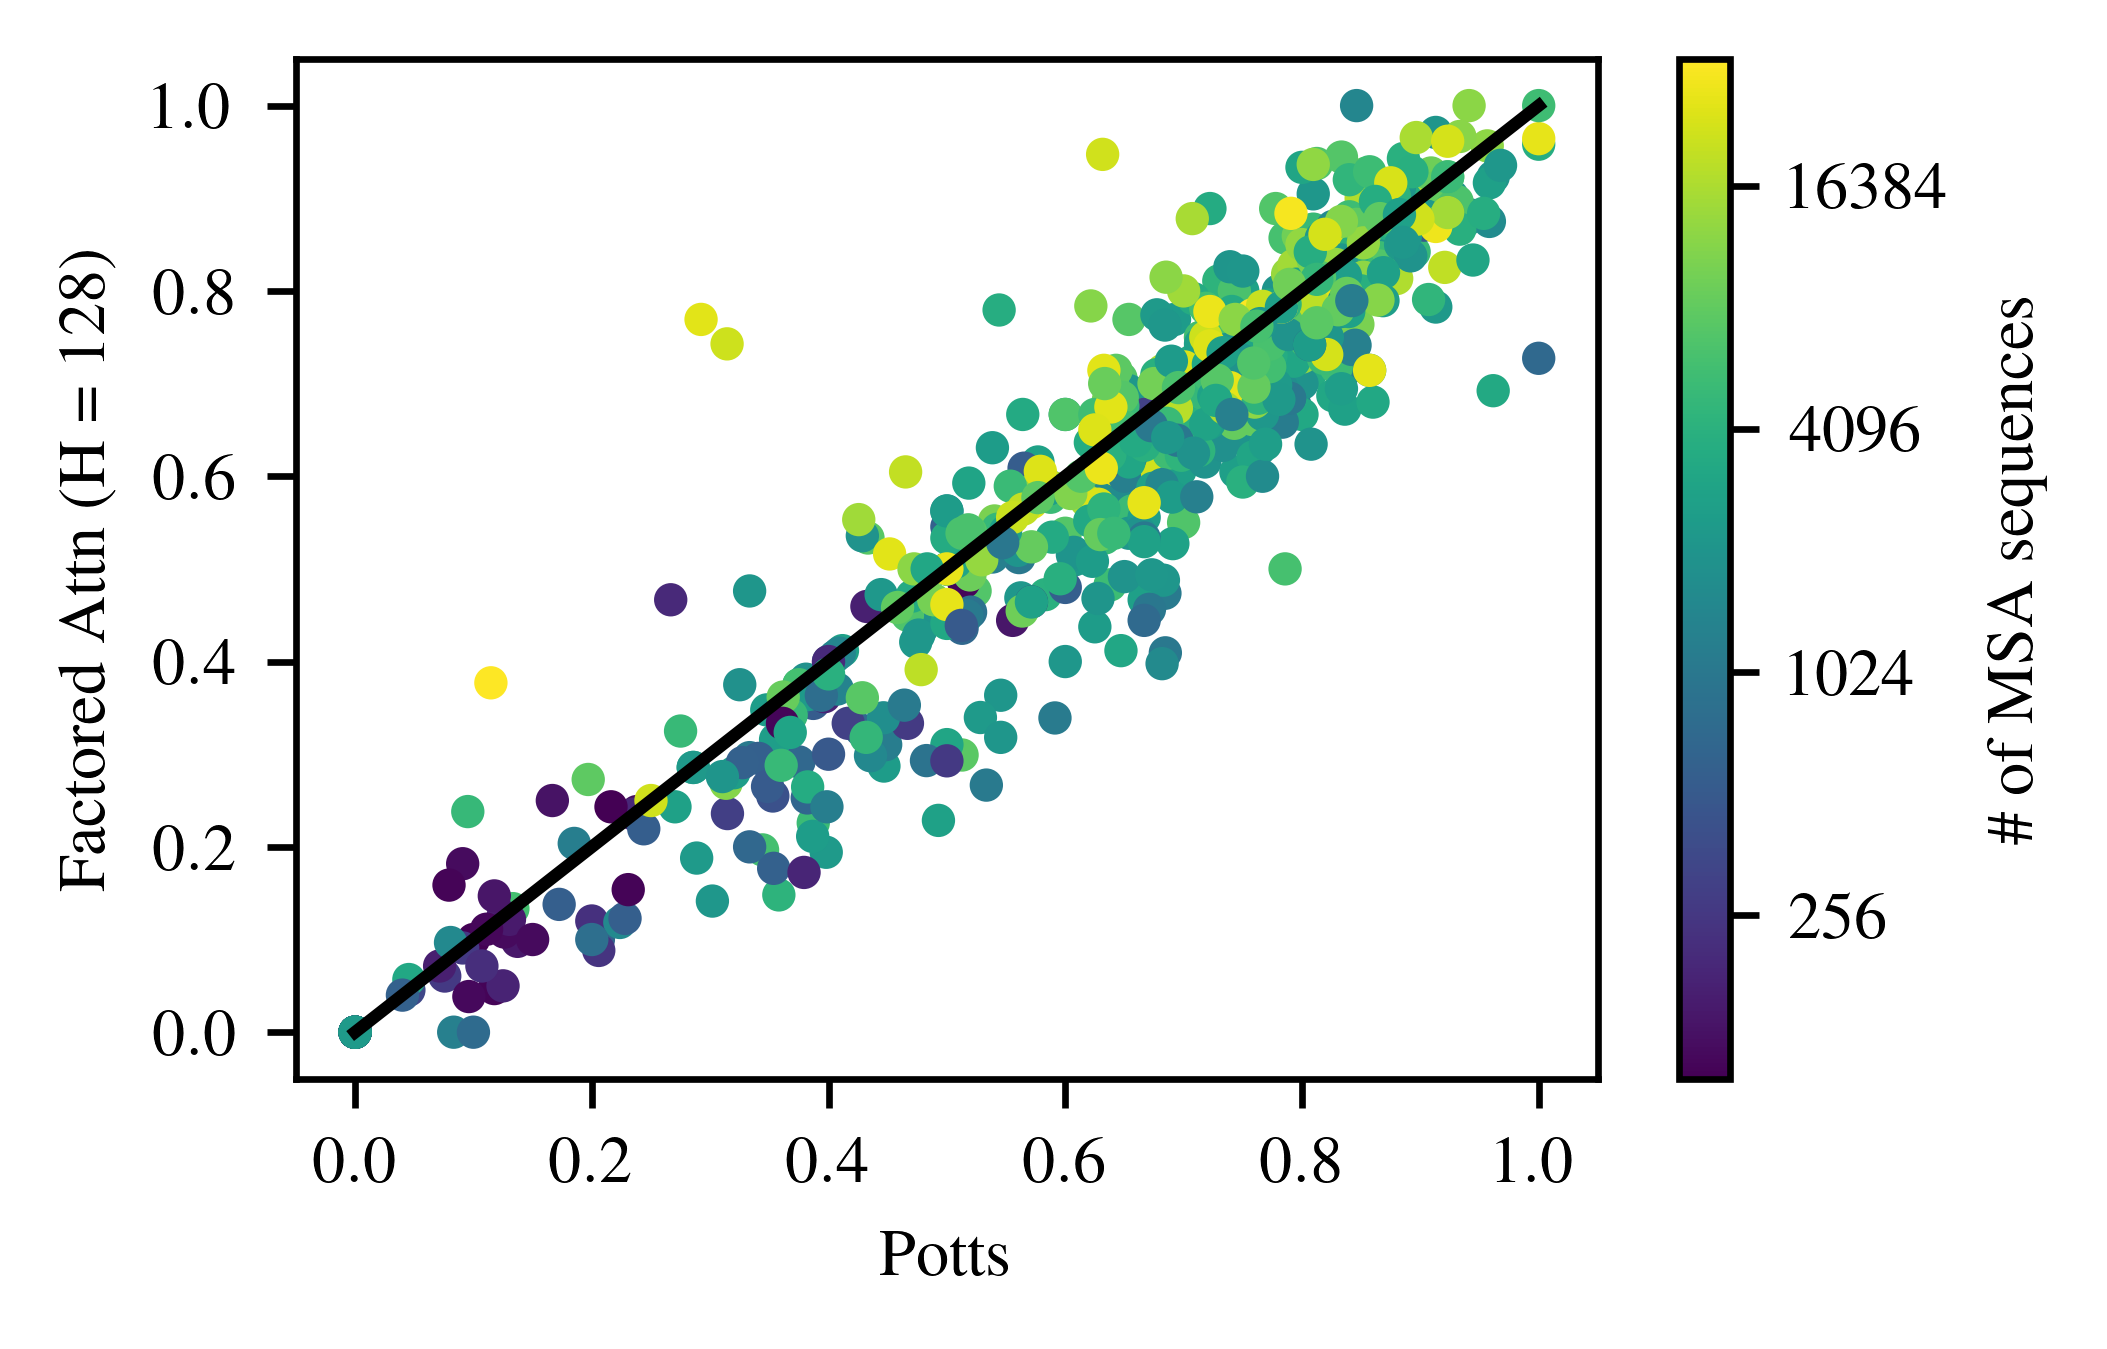

In [160]:
plt.figure(figsize=(3.5, 2.25), dpi=600)
multimsa_pair_plot(fig5_df, "gremlin", "fatt-64", "pr_at_L_5_apc")
plt.ylabel("Factored Attn (H = 128)")
plt.xlabel("Potts")
plt.savefig("figs/final/128_vs_potts.pdf", bbox_inches="tight")
plt.show()

In [175]:
head_32 = fig5_df[(fig5_df.num_attention_heads == 32) & (fig5_df.apc == False)]

In [197]:
gr = fig5_df[fig5_df.sweep_name == "gremlin"].pr_at_L_5_apc
fat = fig5_df[fig5_df.sweep_name == "fatt-64"].pr_at_L_5_apc

((gr - fat) < 0.05).sum()

469

In [177]:
((gr - head_32.pr_at_L_5_apc) < 0.05).sum()

361

# Fig 5

In [24]:
import wandb
api = wandb.Api()
entity = 'proteins'
project = 'iclr2021-rebuttal'
run_id = '3fy6dm62'
run = api.run(f"{entity}/{project}/{run_id}")
fatt_128_hist = run.history()
fatt_128_hist["model"] = "fatt-128"

run_id = '5p63zkjd'
run = api.run(f"{entity}/{project}/{run_id}")
gremlin_hist = run.history()
gremlin_hist["model"] = "gremlin"

run_id = 'tsajgbe0'
run = api.run(f"{entity}/{project}/{run_id}")
fatt_4_hist = run.history()
fatt_4_hist["model"] = "fatt-4"

all_runs_hist = pd.concat([fatt_4_hist, fatt_128_hist, gremlin_hist])

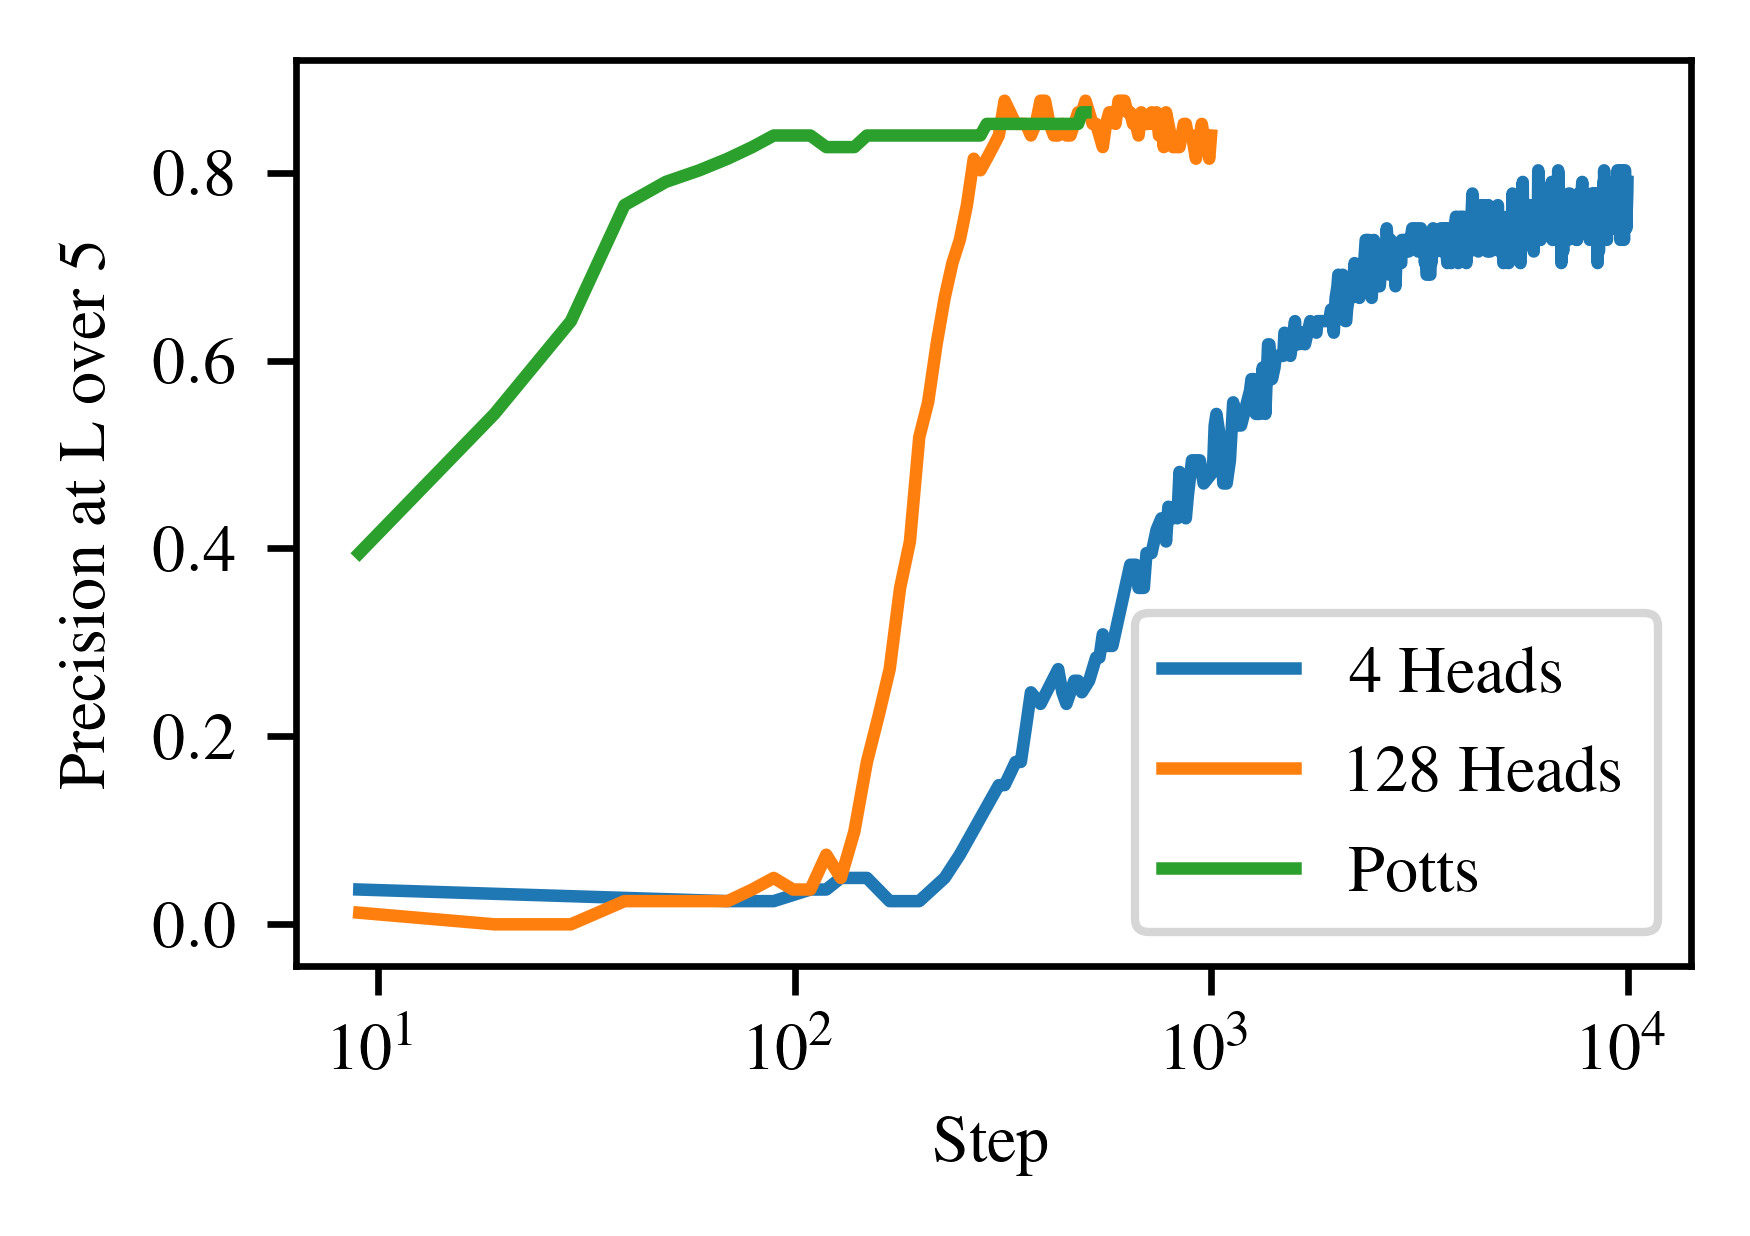

In [25]:
plt.figure(figsize=(3,2), dpi=600)
sns.lineplot(x = "_step", y = "pr_at_L_5_apc", hue="model", data=all_runs_hist)
plt.xlabel("Step")
plt.ylabel("Precision at L over 5")
plt.xscale("log")
plt.minorticks_off()
plt.legend(["4 Heads", "128 Heads", "Potts"])
plt.savefig("figs/final/training_curve.pdf", bbox_inches="tight")
plt.show()

# Figure 6

In [29]:
RUNS_7 = {
    "gremlin": "dbuvl02g",
    "fatt-transf": "827za7k6",
    "fatt": "xuofwjtc",
}

fig7_df = load_full_df(RUNS_7, [], include_model=False)

100%|██████████| 748/748 [00:00<00:00, 42466.49it/s]

dbuvl02g has 748 runs
827za7k6 has 747 runs
xuofwjtc has 748 runs
unfinished included boi
Shape pre dropping NaNs (2235, 14)
Shape post dropping NaNs (2235, 14)



/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/nickbhat/projects/iclr-2021-factored-attention/compare_wandb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

comparison families:  744
spoagef


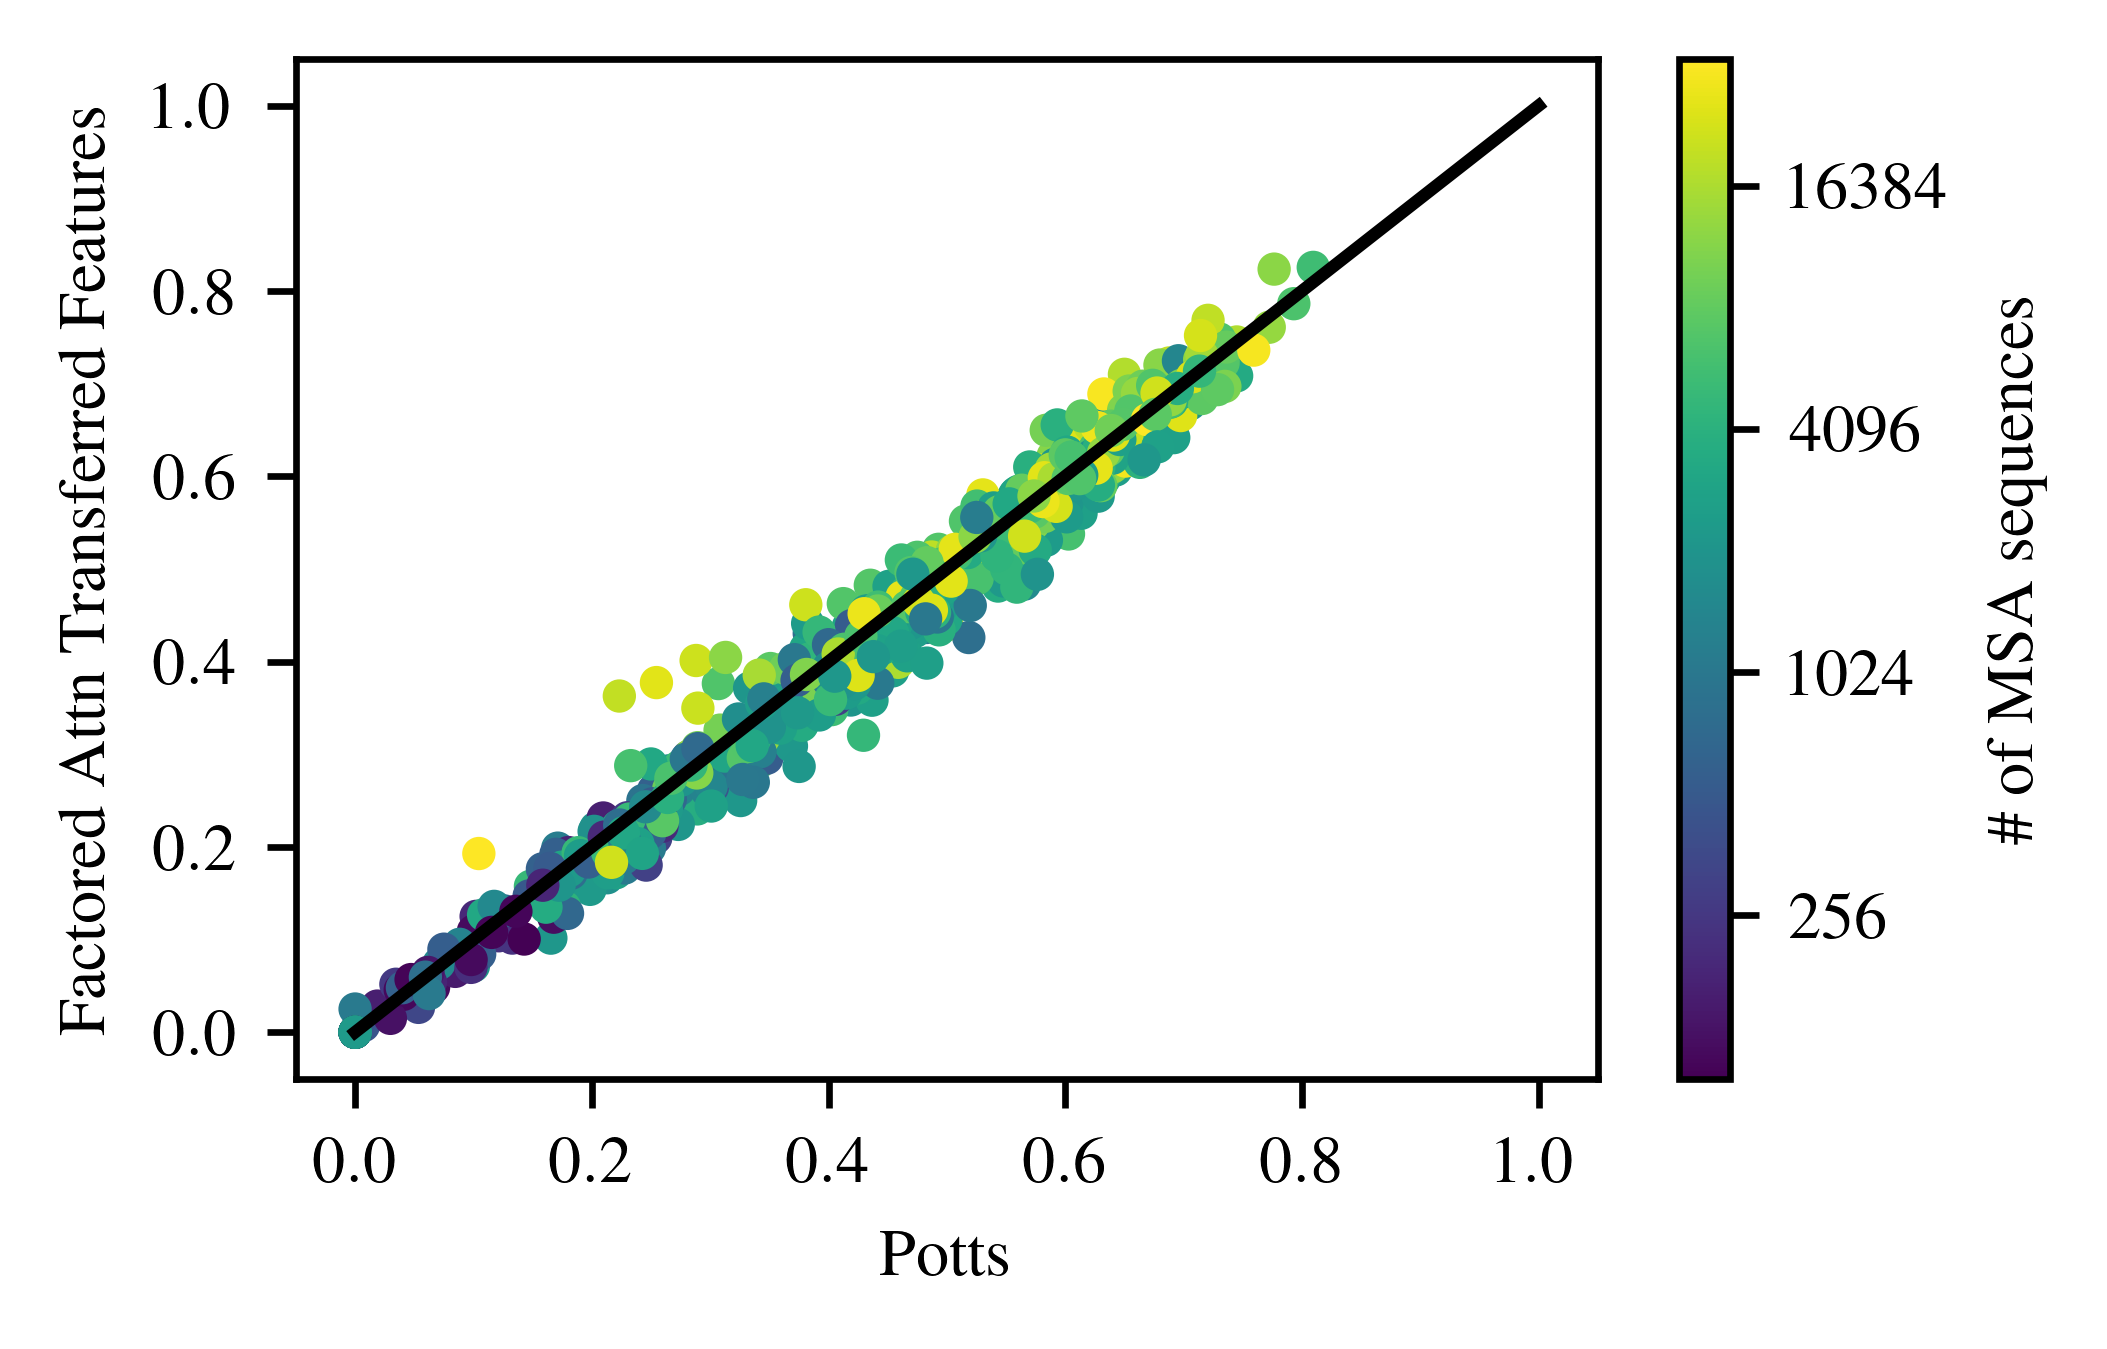

In [31]:
plt.figure(figsize=(3.5, 2.25), dpi=600)
multimsa_pair_plot(fig7_df, "gremlin", "fatt-transf", "pr_at_L_apc")
plt.ylabel("Factored Attn Transferred Features")
plt.xlabel("Potts")
plt.savefig("figs/final/fatt_transf_vs_potts.pdf", bbox_inches="tight")
plt.show()

# Figure 7

/home/nickbhat/projects/mogwai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


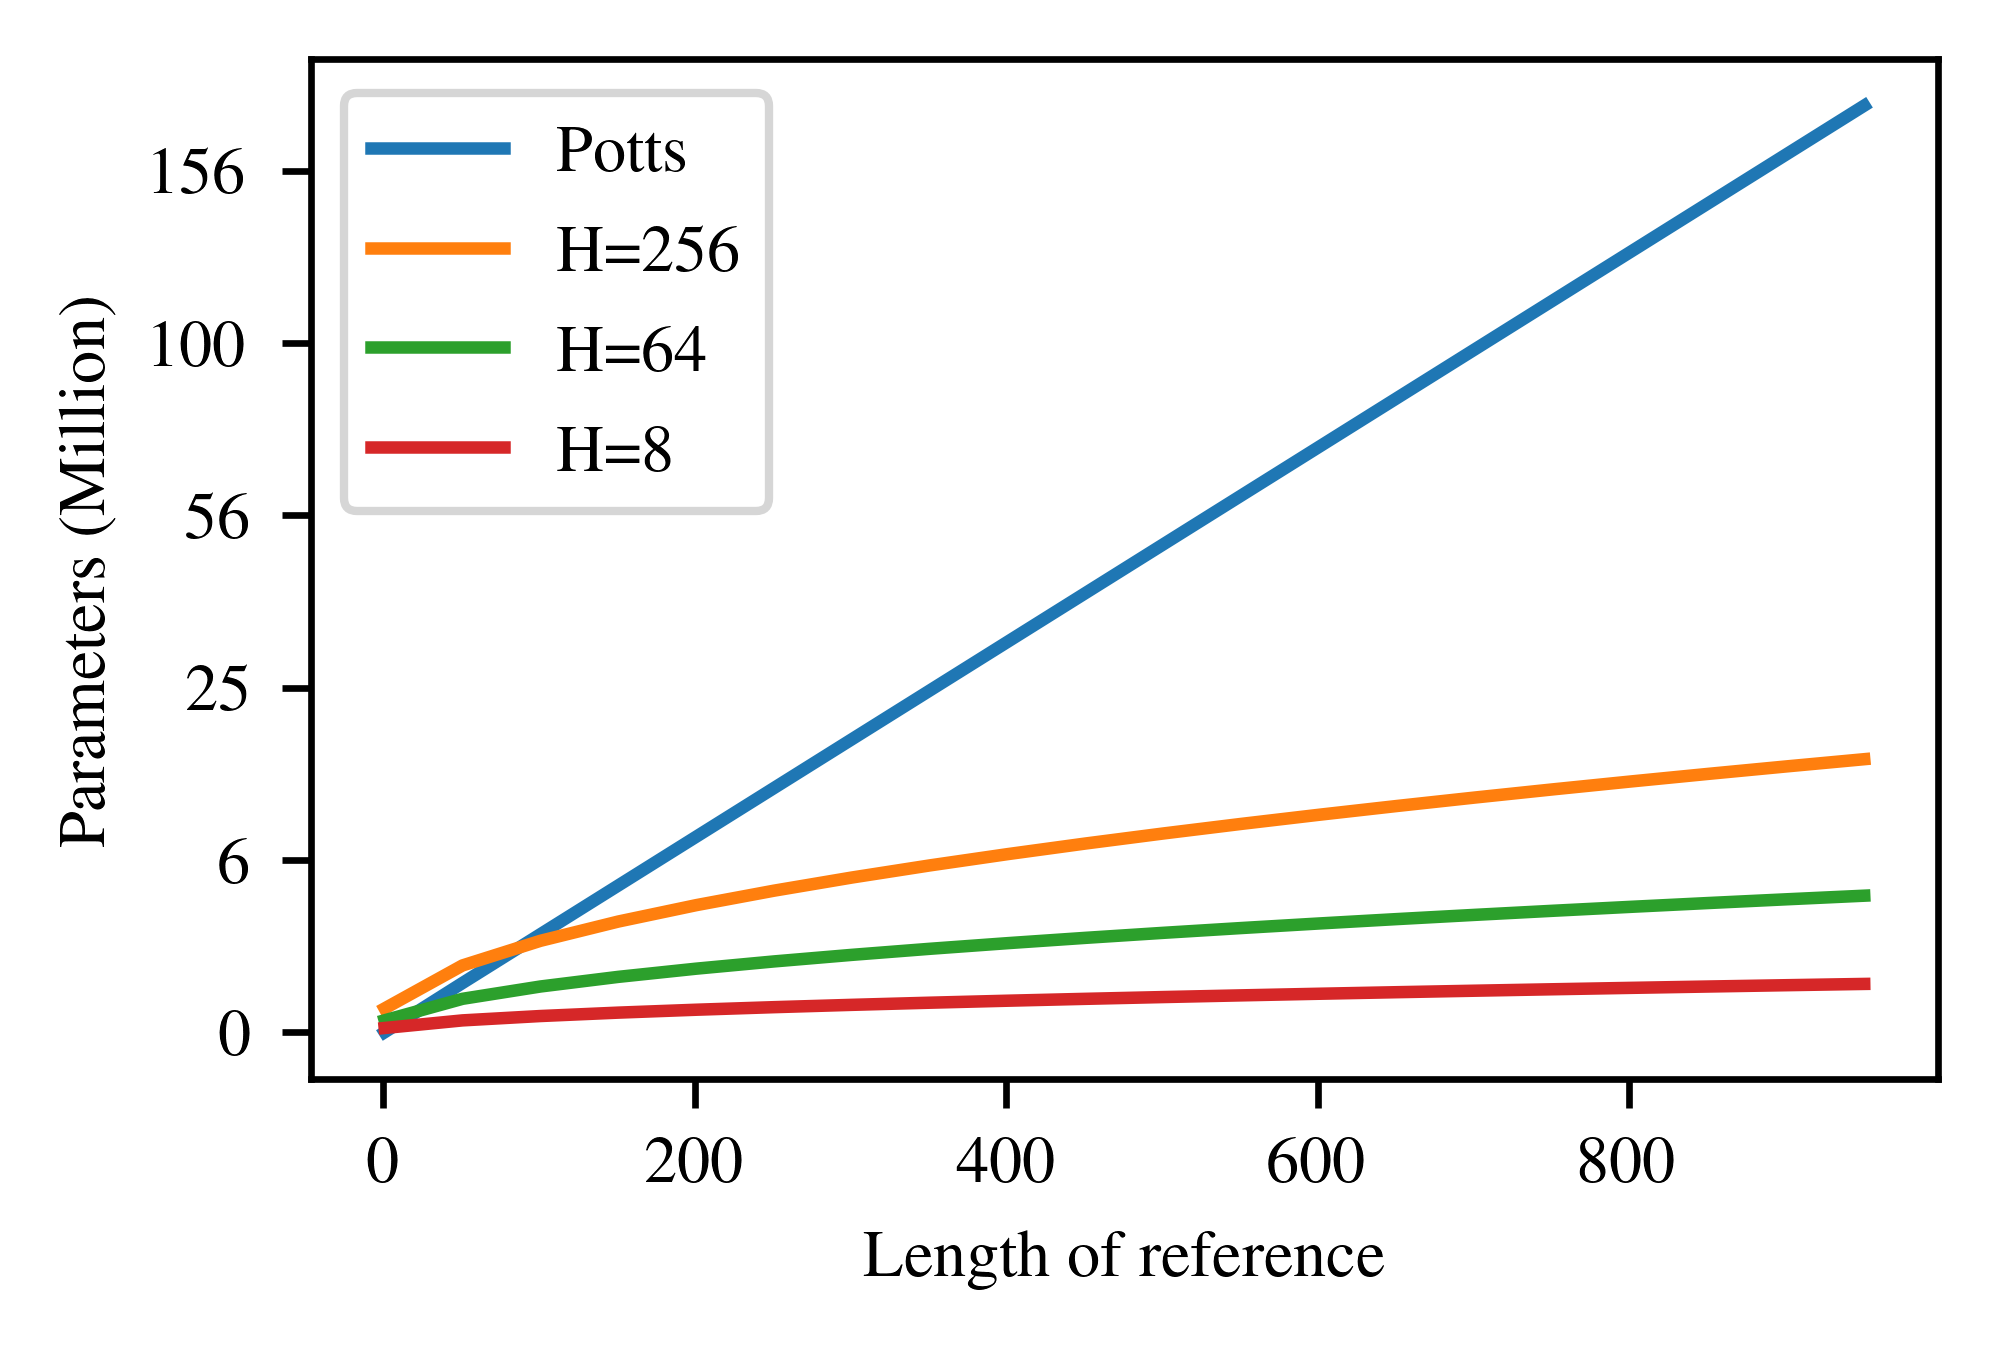

In [229]:
def gremlin(l):
    return l * (l - 1) * 200

def fatt(l, h, d):
    return h * (2 * d * l + 400)

intervals = np.array([0, 2500, 5000, 7500, 10000, 12500])

threshold = 256
many_fams_df = fig4_df[fig4_df.num_seqs > threshold]

D = 32
lens = np.arange(1, 974, 50)

fig, ax = plt.subplots(figsize=(3.5, 2.25), dpi=600)
ax.plot(lens, np.sqrt(gremlin(lens)), label="Potts")
for H in [256, 64, 8]:
    ax.plot(lens, np.sqrt(fatt(lens, H, D)), label=f"H={H}")
ax.legend()
ax.set_ylabel("Parameters (Million)")
ax.set_xlabel("Length of reference")
ax.set_yticklabels([0] + list(np.array(intervals**2 // 1e6).astype(np.int32)))
#ax.ticklabel_format(axis="y", style="sci")
plt.savefig("figs/final/exact_counts.pdf", bbox_inches="tight")
plt.show()